### Задание 1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

data = load_boston()

In [2]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=['price'])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42 )

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled, y_train)

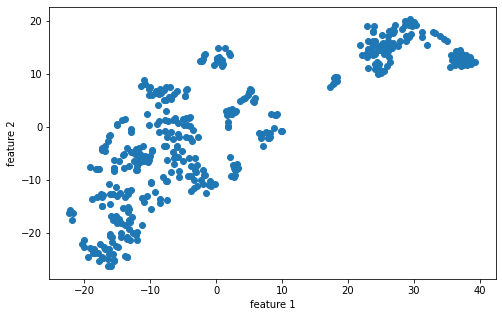

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

### Задание 2

In [8]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=3, max_iter=100, random_state=42)

train_labels = km_model.fit_predict(X_train_scaled, y_train)

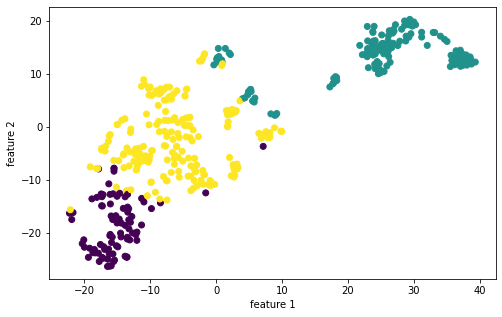

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=train_labels)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [10]:
mean_crim_0 = np.round(X_train['CRIM'][train_labels == 0].mean(), 3)
mean_crim_1 = np.round(X_train['CRIM'][train_labels == 1].mean(), 3)
mean_crim_2 = np.round(X_train['CRIM'][train_labels == 2].mean(), 3)
mean_price_0 = np.round(y_train['price'][train_labels == 0].mean(), 3)
mean_price_1 = np.round(y_train['price'][train_labels == 1].mean(), 3)
mean_price_2 = np.round(y_train['price'][train_labels == 2].mean(), 3)
print(f'MEAN VALUES:\nCRIM cluster 0 = {mean_crim_0}\
\nCRIM cluster 1 = {mean_crim_1}\
\nCRIM cluster 2 = {mean_crim_2}\
\n\nprice cluster 0 = {mean_price_0}\
\nprice cluster 1 = {mean_price_1}\
\nprice cluster 2 = {mean_price_2}')

MEAN VALUES:
CRIM cluster 0 = 0.074
CRIM cluster 1 = 10.797
CRIM cluster 2 = 0.422

price cluster 0 = 27.788
price cluster 1 = 16.165
price cluster 2 = 24.958


Видно, что кластеры распределены таким образом, что средние цены обратно пропорциональны среднему уровню преступности


### Задание 3

In [11]:
# km_test = KMeans(n_clusters=3, max_iter=100, random_state=42)
# test_labels = km_test.fit_transform(X_test_scaled)

In [17]:
test_labels = km_model.predict(X_test_scaled)
test_labels

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2])

In [18]:
mean_crim_0 = np.round(X_test['CRIM'][test_labels == 0].mean(), 3)
mean_crim_1 = np.round(X_test['CRIM'][test_labels == 1].mean(), 3)
mean_crim_2 = np.round(X_test['CRIM'][test_labels == 2].mean(), 3)
mean_price_0 = np.round(y_test['price'][test_labels == 0].mean(), 3)
mean_price_1 = np.round(y_test['price'][test_labels == 1].mean(), 3)
mean_price_2 = np.round(y_test['price'][test_labels == 2].mean(), 3)
print(f'MEAN VALUES:\nCRIM cluster 0 = {mean_crim_0}\
\nCRIM cluster 1 = {mean_crim_1}\
\nCRIM cluster 2 = {mean_crim_2}\
\n\nprice cluster 0 = {mean_price_0}\
\nprice cluster 1 = {mean_price_1}\
\nprice cluster 2 = {mean_price_2}')

MEAN VALUES:
CRIM cluster 0 = 0.062
CRIM cluster 1 = 10.166
CRIM cluster 2 = 0.266

price cluster 0 = 31.35
price cluster 1 = 16.437
price cluster 2 = 21.861


Видно, что кластеры распределены по тому же принципу, что и на тренировочном наборе данных.